In [ ]:
import pandas as pd
final_df = pd.read_parquet('/content/drive/MyDrive/ML_Group_Project/merged_df_new.parquet')


In [ ]:
final_df.head()

,session_id,session_duration,num_events,funnel_sequence,count_click,count_homepage,count_add_to_cart,count_item_detail,count_search,count_booking,...,usage,productDisplayName,num_sessions_per_customer,avg_session_duration,gender_y,home_country_x,first_join_date_x,gender,home_country_y,first_join_date_y
0,00001f29-3ede-4445-95f0-0178934e32ba,2.031120e+05,8,HOMEPAGE→ADD_TO_CART→BOOKING→HOMEPAGE→CLICK→CL...,2,2,1,1,0,1,...,Casual,Puma Women Janine Dance Black Shoes,250.0,2.462289e+05,F,Indonesia,2017-02-05,F,Indonesia,2017-02-05
1,00003eca-954b-4150-aee1-63fc62f395cf,2.335813e+03,4,HOMEPAGE→ADD_TO_CART→BOOKING→PROMO_PAGE,0,1,1,0,0,1,...,Casual,Murcia Women Black Handbag,150.0,2.067626e+05,F,Indonesia,2019-08-16,F,Indonesia,2019-08-16
2,0000425b-ddc8-4459-a240-6ba814dac132,7.072142e+06,4,HOMEPAGE→ADD_TO_CART→BOOKING→PROMO_PAGE,0,1,1,0,0,1,...,None,Lotus Herbals Acne Gel,14.0,3.042543e+06,M,Indonesia,2017-06-26,M,Indonesia,2017-06-26
3,00005746-17ec-449c-9c5c-699a3ea9304a,2.560000e+02,66,HOMEPAGE→ADD_TO_CART→BOOKING→CLICK→SCROLL→SEAR...,23,9,1,8,11,1,...,Sports,Nike Men As Sideline J Black Jackets,155.0,1.536159e+05,M,Indonesia,2020-06-15,M,Indonesia,2020-06-15
4,0000649b-9514-4600-979b-42166a798996,5.219070e+05,18,HOMEPAGE→ADD_TO_CART→ADD_PROMO→BOOKING→CLICK→C...,3,3,3,3,1,1,...,Casual,Cabarelli Men Black Backpack,6.0,3.295924e+06,M,Indonesia,2019-07-21,M,Indonesia,2019-07-21


In [ ]:
session_conversion = final_df.groupby('session_id').agg(
    converted=('payment_status', lambda x: int((x == 'Success').any()))
).reset_index()

In [ ]:
final_df = final_df.merge(session_conversion, on='session_id', how='inner')


In [ ]:
final_df['converted'].value_counts()

,count
converted,
1,815962
0,79241


In [ ]:
final_df.shape

(895203, 48)

In [ ]:
final_df.head()

,session_id,session_duration,num_events,funnel_sequence,count_click,count_homepage,count_add_to_cart,count_item_detail,count_search,count_booking,...,productDisplayName,num_sessions_per_customer,avg_session_duration,gender_y,home_country_x,first_join_date_x,gender,home_country_y,first_join_date_y,converted
0,00001f29-3ede-4445-95f0-0178934e32ba,2.031120e+05,8,HOMEPAGE→ADD_TO_CART→BOOKING→HOMEPAGE→CLICK→CL...,2,2,1,1,0,1,...,Puma Women Janine Dance Black Shoes,250.0,2.462289e+05,F,Indonesia,2017-02-05,F,Indonesia,2017-02-05,1
1,00003eca-954b-4150-aee1-63fc62f395cf,2.335813e+03,4,HOMEPAGE→ADD_TO_CART→BOOKING→PROMO_PAGE,0,1,1,0,0,1,...,Murcia Women Black Handbag,150.0,2.067626e+05,F,Indonesia,2019-08-16,F,Indonesia,2019-08-16,1
2,0000425b-ddc8-4459-a240-6ba814dac132,7.072142e+06,4,HOMEPAGE→ADD_TO_CART→BOOKING→PROMO_PAGE,0,1,1,0,0,1,...,Lotus Herbals Acne Gel,14.0,3.042543e+06,M,Indonesia,2017-06-26,M,Indonesia,2017-06-26,1
3,00005746-17ec-449c-9c5c-699a3ea9304a,2.560000e+02,66,HOMEPAGE→ADD_TO_CART→BOOKING→CLICK→SCROLL→SEAR...,23,9,1,8,11,1,...,Nike Men As Sideline J Black Jackets,155.0,1.536159e+05,M,Indonesia,2020-06-15,M,Indonesia,2020-06-15,1
4,0000649b-9514-4600-979b-42166a798996,5.219070e+05,18,HOMEPAGE→ADD_TO_CART→ADD_PROMO→BOOKING→CLICK→C...,3,3,3,3,1,1,...,Cabarelli Men Black Backpack,6.0,3.295924e+06,M,Indonesia,2019-07-21,M,Indonesia,2019-07-21,1


In [ ]:
final_df.columns

Index(['session_id', 'session_duration', 'num_events', 'funnel_sequence',
       'count_click', 'count_homepage', 'count_add_to_cart',
       'count_item_detail', 'count_search', 'count_booking',
       'count_promo_page', 'count_add_promo', 'session_hour', 'event_per_sec',
       'Unnamed: 0', 'created_at', 'customer_id', 'booking_id',
       'payment_method', 'payment_status', 'promo_amount', 'promo_code',
       'shipment_fee', 'shipment_date_limit', 'shipment_location_lat',
       'shipment_location_long', 'total_amount', 'product_id',
       'quantity_ordered', 'id', 'gender_x', 'masterCategory', 'subCategory',
       'articleType', 'baseColour', 'season', 'year', 'usage',
       'productDisplayName', 'num_sessions_per_customer',
       'avg_session_duration', 'gender_y', 'home_country_x',
       'first_join_date_x', 'gender', 'home_country_y', 'first_join_date_y',
       'converted'],
      dtype='object')

In [ ]:
final_df['events_per_session'] = final_df['num_events'] / (final_df['session_duration'] + 1)


In [ ]:

  """
  Creates funnel-related features.
  """
  # Example: Check if the user reached the cart stage.
  final_df['reached_cart'] = final_df['funnel_sequence'].apply(lambda x: 1 if 'add_to_cart' in str(x) else 0)



In [ ]:
final_df.head()

,session_id,session_duration,num_events,funnel_sequence,count_click,count_homepage,count_add_to_cart,count_item_detail,count_search,count_booking,...,avg_session_duration,gender_y,home_country_x,first_join_date_x,gender,home_country_y,first_join_date_y,converted,events_per_session,reached_cart
0,00001f29-3ede-4445-95f0-0178934e32ba,2.031120e+05,8,HOMEPAGE→ADD_TO_CART→BOOKING→HOMEPAGE→CLICK→CL...,2,2,1,1,0,1,...,2.462289e+05,F,Indonesia,2017-02-05,F,Indonesia,2017-02-05,1,3.938694e-05,0
1,00003eca-954b-4150-aee1-63fc62f395cf,2.335813e+03,4,HOMEPAGE→ADD_TO_CART→BOOKING→PROMO_PAGE,0,1,1,0,0,1,...,2.067626e+05,F,Indonesia,2019-08-16,F,Indonesia,2019-08-16,1,1.711733e-03,0
2,0000425b-ddc8-4459-a240-6ba814dac132,7.072142e+06,4,HOMEPAGE→ADD_TO_CART→BOOKING→PROMO_PAGE,0,1,1,0,0,1,...,3.042543e+06,M,Indonesia,2017-06-26,M,Indonesia,2017-06-26,1,5.655994e-07,0
3,00005746-17ec-449c-9c5c-699a3ea9304a,2.560000e+02,66,HOMEPAGE→ADD_TO_CART→BOOKING→CLICK→SCROLL→SEAR...,23,9,1,8,11,1,...,1.536159e+05,M,Indonesia,2020-06-15,M,Indonesia,2020-06-15,1,2.568093e-01,0
4,0000649b-9514-4600-979b-42166a798996,5.219070e+05,18,HOMEPAGE→ADD_TO_CART→ADD_PROMO→BOOKING→CLICK→C...,3,3,3,3,1,1,...,3.295924e+06,M,Indonesia,2019-07-21,M,Indonesia,2019-07-21,1,3.448884e-05,0


In [ ]:
def safe_ordinal_encoder(sequence):
  sequence = str(sequence)
  if 'ADD_TO_CART' in sequence:
    return 4
  elif 'ITEM_DETAIL' in sequence:
    return 3
  elif 'SEARCH' in sequence:
    return 2
  elif 'HOMEPAGE' in sequence:
    return 1
  else:
    return 0

In [ ]:
final_df['funnel_depth_score'] = final_df['funnel_sequence'].apply(safe_ordinal_encoder)


In [ ]:
final_df['funnel_depth_score'].value_counts()

,count
funnel_depth_score,
4,872061
3,10108
1,8622
2,4412


In [ ]:
# Recommended columns to dro
columns_to_drop = [
    'first_join_date_y', 'reached_booking', 'shipment_location_long', 'shipment_location_lat'
]

# Simulate a sample DataFrame (for testing structure)
df_for_modeling = final_df.drop(columns=columns_to_drop, errors='ignore')



In [ ]:
df_for_modeling.columns

Index(['session_id', 'session_duration', 'num_events', 'funnel_sequence',
       'count_click', 'count_homepage', 'count_add_to_cart',
       'count_item_detail', 'count_search', 'count_booking',
       'count_promo_page', 'count_add_promo', 'session_hour', 'event_per_sec',
       'Unnamed: 0', 'created_at', 'customer_id', 'booking_id',
       'payment_method', 'payment_status', 'promo_amount', 'promo_code',
       'shipment_fee', 'shipment_date_limit', 'total_amount', 'product_id',
       'quantity_ordered', 'id', 'gender_x', 'masterCategory', 'subCategory',
       'articleType', 'baseColour', 'season', 'year', 'usage',
       'productDisplayName', 'num_sessions_per_customer',
       'avg_session_duration', 'gender_y', 'home_country_x',
       'first_join_date_x', 'gender', 'home_country_y', 'converted',
       'events_per_session', 'reached_cart', 'funnel_depth_score'],
      dtype='object')

In [ ]:
df_for_modeling['session_duration_bucket'] = pd.cut(
    df_for_modeling['session_duration'],
    bins=[0, 60, 180, 600, 1800, float('inf')],
    labels=['<1 min', '1-3 min', '3-10 min', '10-30 min', '30+ min']
)

In [ ]:
df_for_modeling

,session_id,session_duration,num_events,funnel_sequence,count_click,count_homepage,count_add_to_cart,count_item_detail,count_search,count_booking,...,avg_session_duration,gender_y,home_country_x,first_join_date_x,gender,home_country_y,converted,events_per_session,reached_cart,funnel_depth_score
0,00001f29-3ede-4445-95f0-0178934e32ba,2.031120e+05,8,HOMEPAGE→ADD_TO_CART→BOOKING→HOMEPAGE→CLICK→CL...,2,2,1,1,0,1,...,2.462289e+05,F,Indonesia,2017-02-05,F,Indonesia,1,3.938694e-05,0,4
1,00003eca-954b-4150-aee1-63fc62f395cf,2.335813e+03,4,HOMEPAGE→ADD_TO_CART→BOOKING→PROMO_PAGE,0,1,1,0,0,1,...,2.067626e+05,F,Indonesia,2019-08-16,F,Indonesia,1,1.711733e-03,0,4
2,0000425b-ddc8-4459-a240-6ba814dac132,7.072142e+06,4,HOMEPAGE→ADD_TO_CART→BOOKING→PROMO_PAGE,0,1,1,0,0,1,...,3.042543e+06,M,Indonesia,2017-06-26,M,Indonesia,1,5.655994e-07,0,4
3,00005746-17ec-449c-9c5c-699a3ea9304a,2.560000e+02,66,HOMEPAGE→ADD_TO_CART→BOOKING→CLICK→SCROLL→SEAR...,23,9,1,8,11,1,...,1.536159e+05,M,Indonesia,2020-06-15,M,Indonesia,1,2.568093e-01,0,4
4,0000649b-9514-4600-979b-42166a798996,5.219070e+05,18,HOMEPAGE→ADD_TO_CART→ADD_PROMO→BOOKING→CLICK→C...,3,3,3,3,1,1,...,3.295924e+06,M,Indonesia,2019-07-21,M,Indonesia,1,3.448884e-05,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895198,ffffce53-1ba7-4d7d-a14a-ffa7079cfbff,3.243190e+05,19,HOMEPAGE→ADD_TO_CART→ADD_TO_CART→ADD_PROMO→BOO...,3,5,2,0,2,1,...,8.583644e+05,F,Indonesia,2017-07-22,F,Indonesia,1,5.858411e-05,0,4
895199,ffffd3d9-79db-459e-a427-388204a7aac7,5.237100e+04,19,HOMEPAGE→ADD_TO_CART→ADD_TO_CART→ADD_PROMO→BOO...,3,2,4,2,1,1,...,9.526491e+05,F,Indonesia,2019-11-02,F,Indonesia,1,3.627893e-04,0,4
895200,ffffdf8e-dea1-42bc-9839-7662675c0d38,6.225890e+05,40,HOMEPAGE→ADD_TO_CART→BOOKING→HOMEPAGE→ITEM_DET...,11,7,1,5,2,1,...,5.458156e+05,M,Indonesia,2019-08-24,M,Indonesia,1,6.424774e-05,0,4
895201,fffff7cf-2a18-4303-9c12-aa836ae3b543,1.699490e+05,15,HOMEPAGE→ADD_TO_CART→ADD_PROMO→BOOKING→CLICK→S...,4,1,5,1,1,1,...,2.258612e+05,M,Indonesia,2020-06-27,M,Indonesia,1,8.826125e-05,0,4


In [ ]:
df_for_modeling['total_amount_bucket'] = pd.cut(
    df_for_modeling['total_amount'],
    bins=[0, 200_000, 300_000, 400_000, 500_000, float('inf')],
    labels=['Low', 'Medium', 'High', 'Very High', 'Premium']
)

In [ ]:
df_for_modeling['gender_encoded'] = df_for_modeling['gender'].map({'F': 0, 'M': 1})


In [ ]:
final_df['product_freq'] = final_df.groupby('product_id')['product_id'].transform('count')


In [ ]:
import pandas as pd

df_for_modeling['created_at'] = pd.to_datetime(df_for_modeling['created_at'], errors='coerce')
df_for_modeling['shipment_date_limit'] = pd.to_datetime(df_for_modeling['shipment_date_limit'], errors='coerce')


df_for_modeling['days_until_shipment'] = (
    (df_for_modeling['shipment_date_limit'] - df_for_modeling['created_at']).dt.days
)

In [ ]:
columns_to_drop = [
    'Unnamed: 0', 'subCategory', 'Unnamed: 0', 'id', 'gender', 'gender_y', 'gender_x', 'home_country_y', 'baseColour', 'first_join_date_x', 'first_join_date_y',
    'shipment_location_long', 'shipment_location_lat', 'customer_id', 'session_id', 'booking_id', 'product_id',
]

df_for_modeling = df_for_modeling.drop(columns=columns_to_drop, errors='ignore')


In [ ]:
df_for_modeling.columns

Index(['session_duration', 'num_events', 'funnel_sequence', 'count_click',
       'count_homepage', 'count_add_to_cart', 'count_item_detail',
       'count_search', 'count_booking', 'count_promo_page', 'count_add_promo',
       'session_hour', 'event_per_sec', 'created_at', 'payment_method',
       'payment_status', 'promo_amount', 'promo_code', 'shipment_fee',
       'shipment_date_limit', 'total_amount', 'quantity_ordered',
       'masterCategory', 'articleType', 'season', 'year', 'usage',
       'productDisplayName', 'num_sessions_per_customer',
       'avg_session_duration', 'home_country_x', 'converted',
       'events_per_session', 'reached_cart', 'funnel_depth_score',
       'total_amount_bucket', 'gender_encoded', 'days_until_shipment'],
      dtype='object')

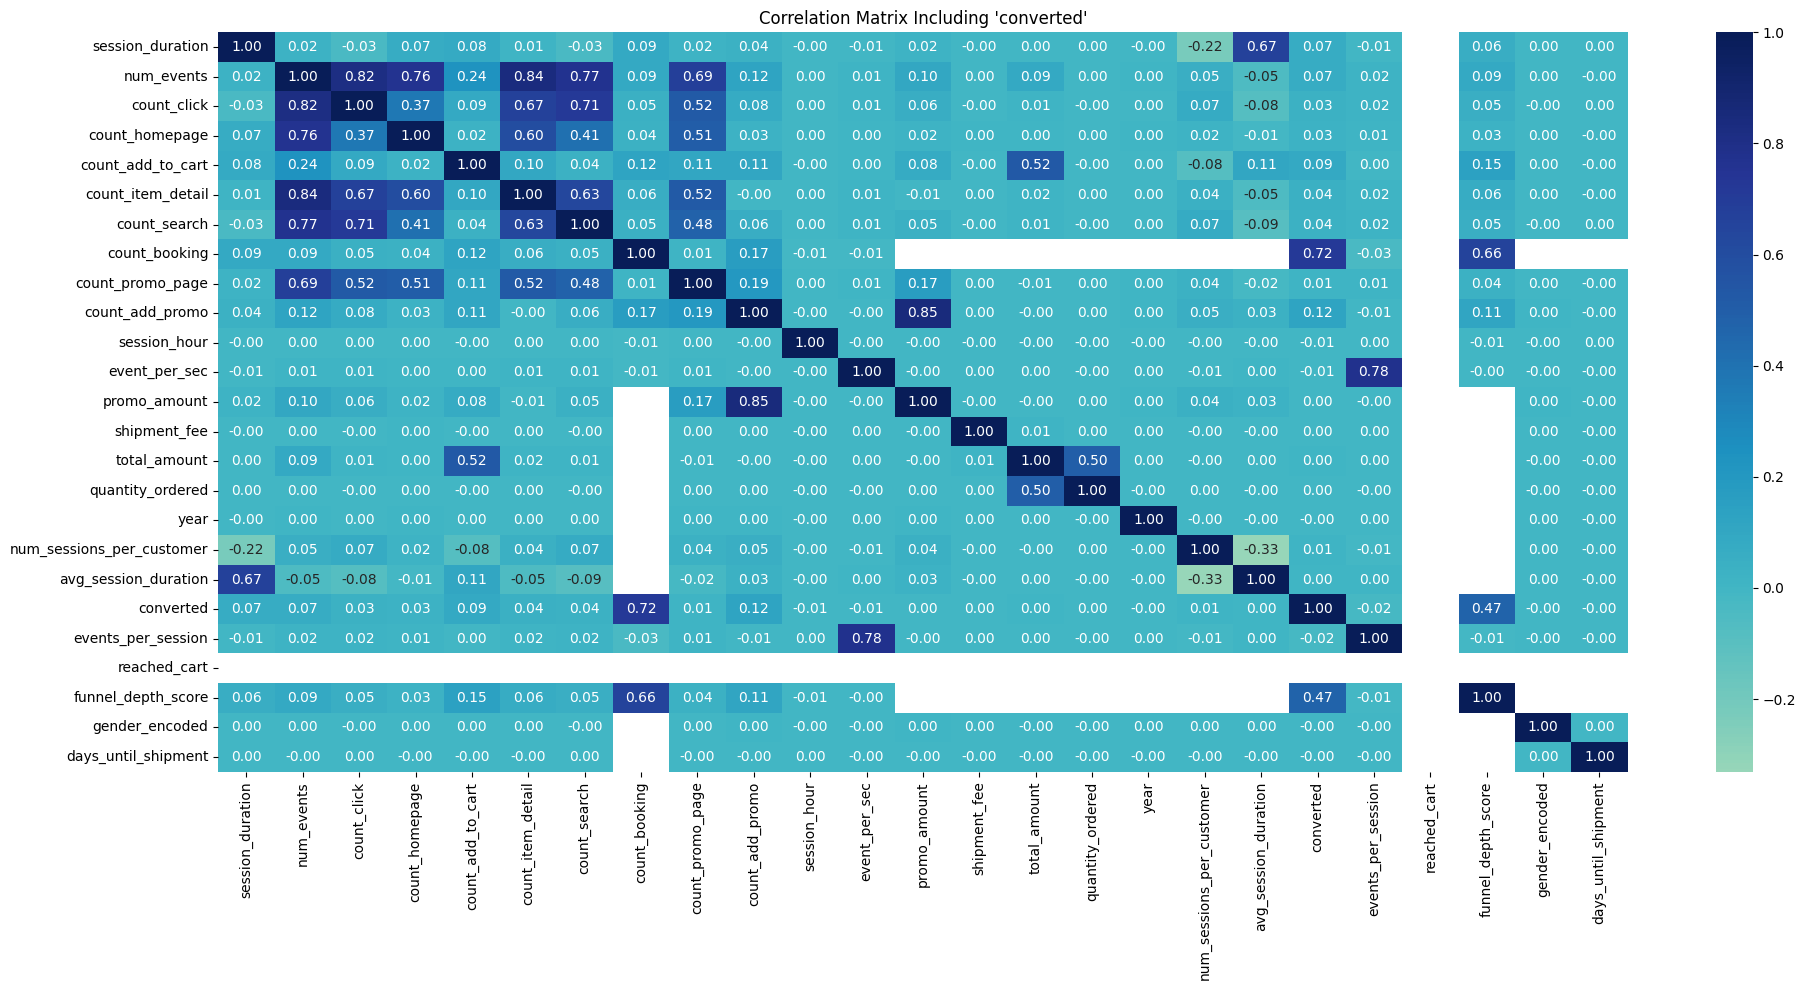

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure 'converted' is numeric (usually it is, as 0/1)
df_for_modeling['converted'] = df_for_modeling['converted'].astype(int)

# Compute correlation matrix for only numeric columns including 'converted'
corr = df_for_modeling.select_dtypes(include='number').corr()

# Plot heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt='.2f', center=0)
plt.title("Correlation Matrix Including 'converted'")
plt.tight_layout()
plt.show()

In [ ]:
#This calculates the historical conversion rate for the given product up to that point in time:

df_for_modeling = df_for_modeling.sort_values('created_at')


product_conv_rate_list = []
category_conv_rate_list = []

product_stats = {}
category_stats = {}

for _, row in df_for_modeling.iterrows():
    product = row['productDisplayName']
    category = row['masterCategory']
    converted = row['converted']

    if product in product_stats:
        conv_rate = product_stats[product]['sum'] / product_stats[product]['count']
    else:
        conv_rate = 0.0  # or np.nan if you want to ignore early rows

    if category in category_stats and category_stats[category]['count'] > 0:
        category_conv_rate = category_stats[category]['sum'] / category_stats[category]['count']
    else:
        category_conv_rate = 0.0  # or np.nan

    product_conv_rate_list.append(conv_rate)
    category_conv_rate_list.append(category_conv_rate)

    product_stats.setdefault(product, {'sum': 0, 'count': 0})
    category_stats.setdefault(category, {'sum': 0, 'count': 0})

    product_stats[product]['sum'] += converted
    product_stats[product]['count'] += 1

    category_stats[category]['sum'] += converted
    category_stats[category]['count'] += 1

df_for_modeling['productDisplayName_conv_rate'] = product_conv_rate_list
df_for_modeling['masterCategory_conv_rate'] = category_conv_rate_list

In [ ]:
df_for_modeling['productDisplayName_conv_rate'].value_counts()

,count
productDisplayName_conv_rate,
1.000000,413660
0.000000,32501
0.909091,12002
0.916667,11969
0.900000,11922
...,...
0.041354,1
0.041350,1
0.041347,1


In [ ]:
df_for_modeling['masterCategory_conv_rate'].value_counts()

,count
masterCategory_conv_rate,
0.956522,367
0.958333,220
0.957447,139
1.000000,132
0.956989,110
...,...
0.956741,1
0.958261,1
0.958261,1


In [ ]:
leakage_cols = [
    'payment_method',
    'payment_status',
    'shipment_date_limit',   # already covered via days_until_shipment
    'total_amount',          # leaks info about purchases
    'count_booking'
]

In [ ]:
df_for_modeling.drop(columns=leakage_cols, inplace=True)


In [ ]:
df_for_modeling.columns

Index(['session_duration', 'num_events', 'funnel_sequence', 'count_click',
       'count_homepage', 'count_add_to_cart', 'count_item_detail',
       'count_search', 'count_promo_page', 'count_add_promo', 'session_hour',
       'event_per_sec', 'created_at', 'promo_amount', 'promo_code',
       'shipment_fee', 'quantity_ordered', 'masterCategory', 'articleType',
       'season', 'year', 'usage', 'productDisplayName',
       'num_sessions_per_customer', 'avg_session_duration', 'home_country_x',
       'converted', 'events_per_session', 'reached_cart', 'funnel_depth_score',
       'total_amount_bucket', 'gender_encoded', 'days_until_shipment',
       'productDisplayName_conv_rate', 'masterCategory_conv_rate'],
      dtype='object')

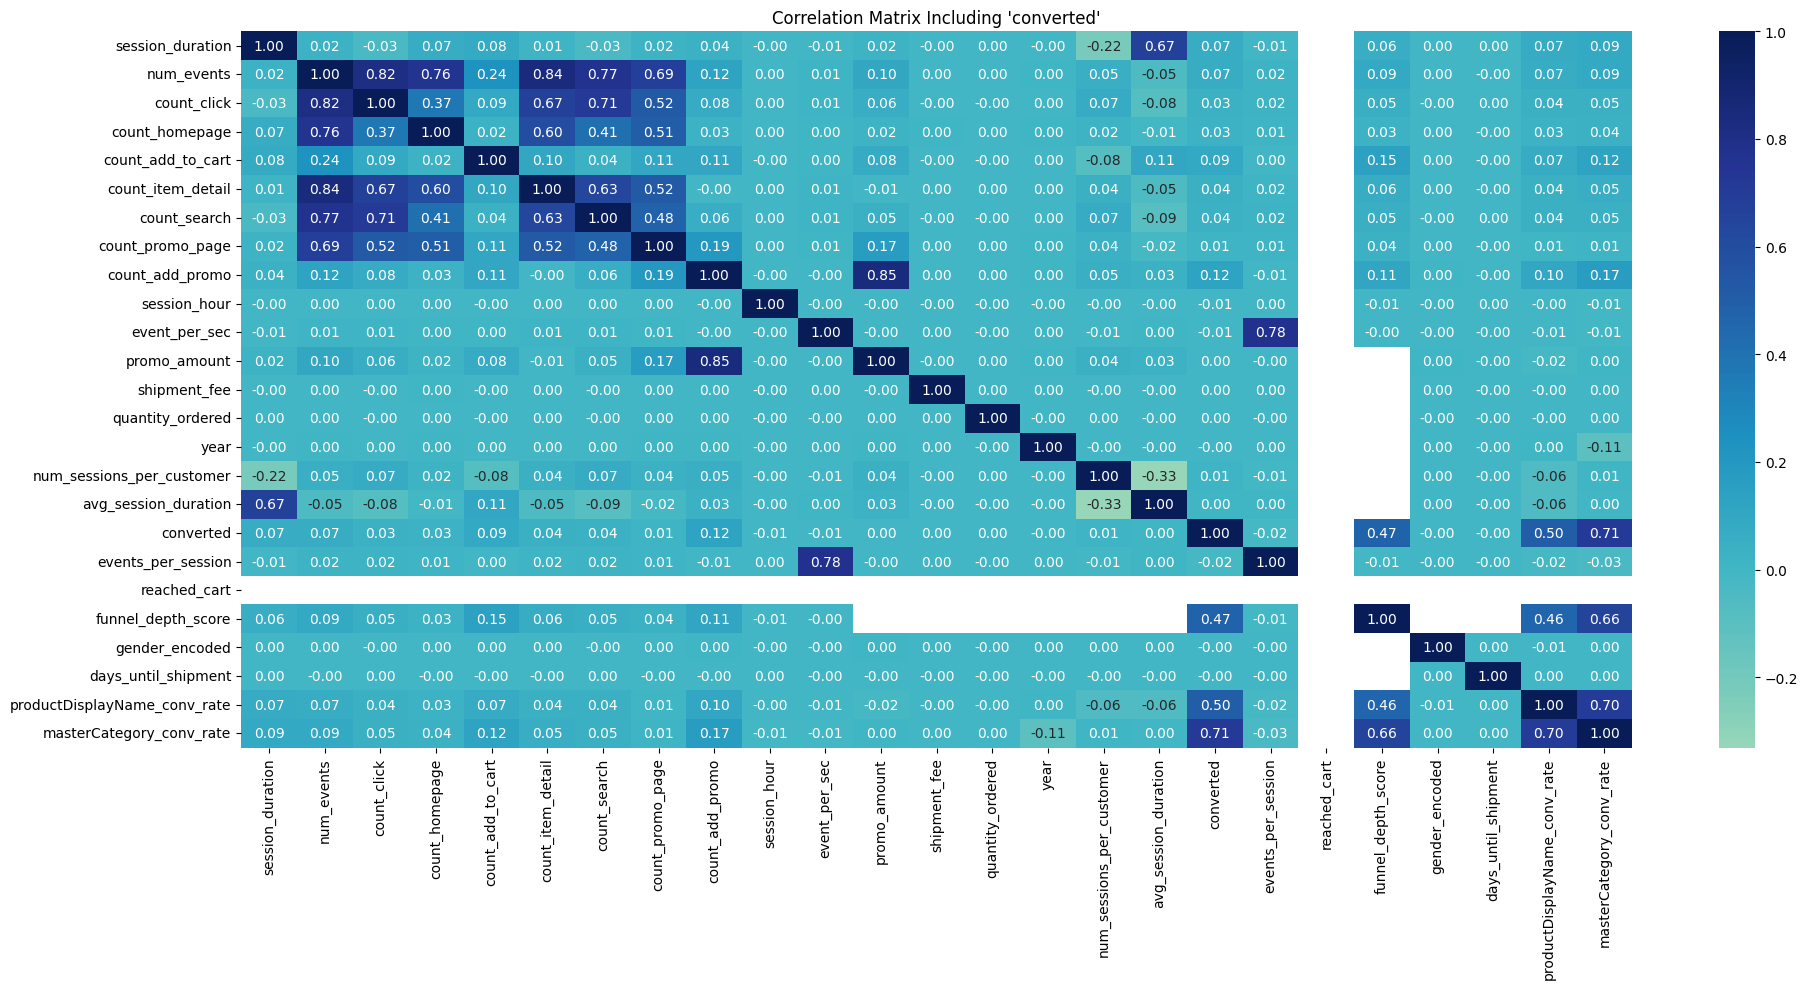

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure 'converted' is numeric (usually it is, as 0/1)
df_for_modeling['converted'] = df_for_modeling['converted'].astype(int)

# Compute correlation matrix for only numeric columns including 'converted'
corr = df_for_modeling.select_dtypes(include='number').corr()

# Plot heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt='.2f', center=0)
plt.title("Correlation Matrix Including 'converted'")
plt.tight_layout()
plt.show()

In [ ]:
df_for_modeling.to_parquet('df_for_modeling_v4.parquet')

In [ ]:
import pandas as pd
df = pd.read_parquet('/content/drive/MyDrive/BAML/df_for_modeling_v3.parquet')
df.head()

,session_duration,num_events,funnel_sequence,count_click,count_homepage,count_add_to_cart,count_item_detail,count_search,count_booking,count_promo_page,...,converted,events_per_session,reached_cart,funnel_depth_score,session_duration_bucket,total_amount_bucket,gender_encoded,days_until_shipment,productDisplayName_conv_rate,masterCategory_conv_rate
336433,1148.538547,14,HOMEPAGE→ADD_TO_CART→BOOKING→SCROLL→CLICK→SCRO...,3,2,1,2,0,1,0,...,1,0.012179,0,5,10-30 min,Premium,0.0,3.0,0.0,0.0
691128,2446.859322,7,HOMEPAGE→ADD_TO_CART→ADD_TO_CART→ADD_PROMO→BOO...,0,1,2,1,1,1,0,...,1,0.002860,0,5,30+ min,Premium,1.0,5.0,0.0,1.0
656878,311.256251,5,HOMEPAGE→ADD_TO_CART→BOOKING→ADD_TO_CART→ADD_T...,0,1,3,0,0,1,0,...,1,0.016012,0,5,3-10 min,High,1.0,2.0,0.0,1.0
499795,2074.826045,6,HOMEPAGE→ADD_TO_CART→BOOKING→SCROLL→PROMO_PAGE...,0,1,1,0,0,1,2,...,1,0.002890,0,5,30+ min,Medium,1.0,4.0,0.0,0.0
780090,3130.462766,19,HOMEPAGE→ADD_TO_CART→BOOKING→CLICK→ADD_TO_CART...,5,3,7,0,2,1,0,...,1,0.006067,0,5,30+ min,Premium,0.0,2.0,0.0,1.0


In [ ]:
df.drop(columns=['count_booking'], inplace=True)


In [ ]:
df.columns

Index(['session_duration', 'num_events', 'funnel_sequence', 'count_click',
       'count_homepage', 'count_add_to_cart', 'count_item_detail',
       'count_search', 'count_promo_page', 'count_add_promo', 'session_hour',
       'event_per_sec', 'created_at', 'payment_method', 'payment_status',
       'promo_amount', 'promo_code', 'shipment_fee', 'shipment_date_limit',
       'total_amount', 'quantity_ordered', 'masterCategory', 'articleType',
       'season', 'year', 'usage', 'productDisplayName',
       'num_sessions_per_customer', 'avg_session_duration', 'home_country_x',
       'converted', 'events_per_session', 'reached_cart', 'funnel_depth_score',
       'session_duration_bucket', 'total_amount_bucket', 'gender_encoded',
       'days_until_shipment', 'productDisplayName_conv_rate',
       'masterCategory_conv_rate'],
      dtype='object')

In [ ]:
leakage_cols = [
    'payment_method',
    'payment_status',
    'shipment_date_limit',   # already covered via days_until_shipment
    # 'total_amount',          # leaks info about purchases
]

In [ ]:
df.drop(columns=leakage_cols, inplace=True)


In [ ]:
df.head()

,session_duration,num_events,funnel_sequence,count_click,count_homepage,count_add_to_cart,count_item_detail,count_search,count_promo_page,count_add_promo,...,converted,events_per_session,reached_cart,funnel_depth_score,session_duration_bucket,total_amount_bucket,gender_encoded,days_until_shipment,productDisplayName_conv_rate,masterCategory_conv_rate
336433,1148.538547,14,HOMEPAGE→ADD_TO_CART→BOOKING→SCROLL→CLICK→SCRO...,3,2,1,2,0,0,0,...,1,0.012179,0,5,10-30 min,Premium,0.0,3.0,0.0,0.0
691128,2446.859322,7,HOMEPAGE→ADD_TO_CART→ADD_TO_CART→ADD_PROMO→BOO...,0,1,2,1,1,0,1,...,1,0.002860,0,5,30+ min,Premium,1.0,5.0,0.0,1.0
656878,311.256251,5,HOMEPAGE→ADD_TO_CART→BOOKING→ADD_TO_CART→ADD_T...,0,1,3,0,0,0,0,...,1,0.016012,0,5,3-10 min,High,1.0,2.0,0.0,1.0
499795,2074.826045,6,HOMEPAGE→ADD_TO_CART→BOOKING→SCROLL→PROMO_PAGE...,0,1,1,0,0,2,0,...,1,0.002890,0,5,30+ min,Medium,1.0,4.0,0.0,0.0
780090,3130.462766,19,HOMEPAGE→ADD_TO_CART→BOOKING→CLICK→ADD_TO_CART...,5,3,7,0,2,0,0,...,1,0.006067,0,5,30+ min,Premium,0.0,2.0,0.0,1.0


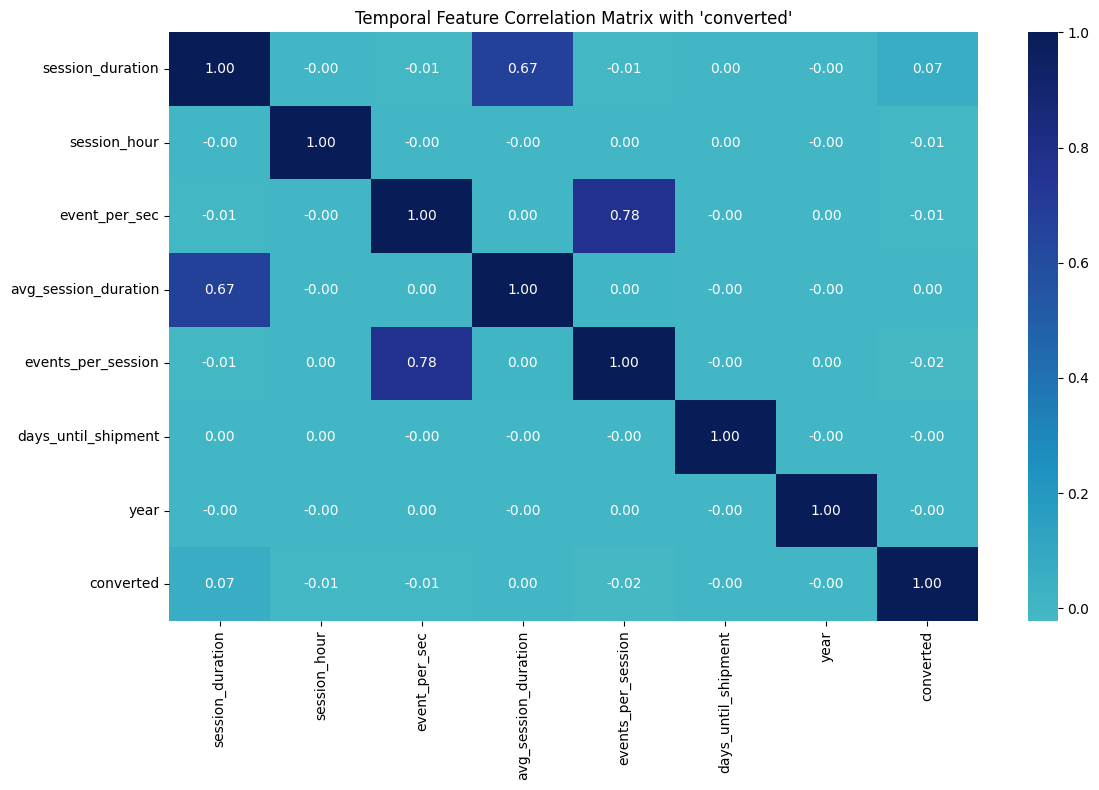

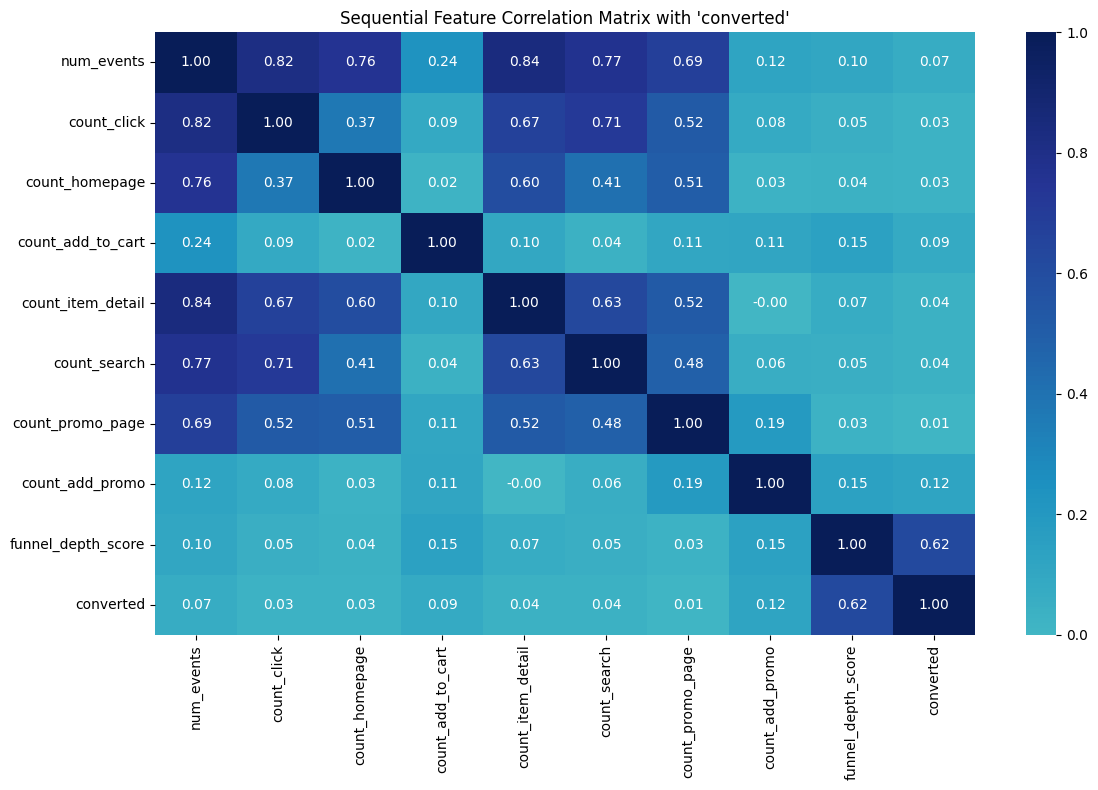

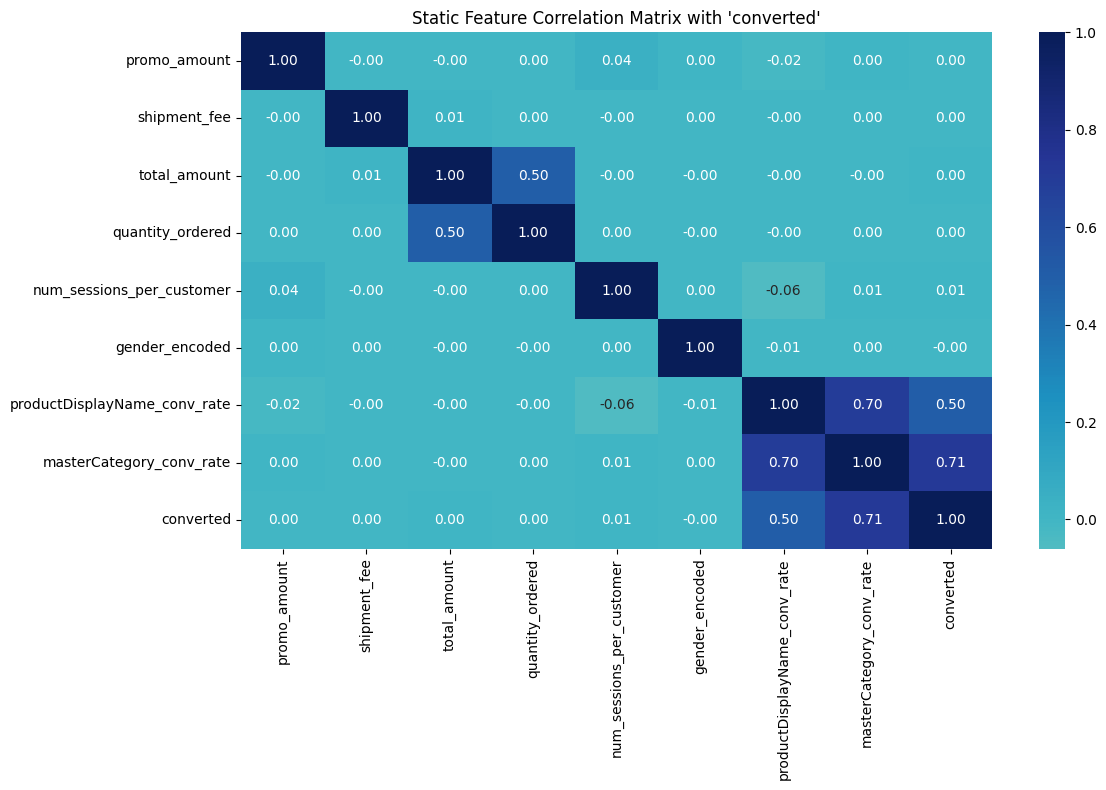

In [ ]:
import pandas as pd

# Load the same DataFrame as in previous code (assume it's still available as final_df)
# Define column groupings
temporal_features = [
    'session_duration', 'session_hour', 'event_per_sec', 'avg_session_duration',
    'events_per_session', 'days_until_shipment', 'year'
]

sequential_features = [
    'num_events', 'count_click', 'count_homepage', 'count_add_to_cart',
    'count_item_detail', 'count_search', 'count_promo_page', 'count_add_promo',
    'funnel_depth_score'
]

static_features = [
    'promo_amount', 'shipment_fee', 'total_amount', 'quantity_ordered',
    'num_sessions_per_customer', 'gender_encoded', 'productDisplayName_conv_rate',
    'masterCategory_conv_rate'
]

# Add target to all sets
feature_sets = {
    'Temporal': temporal_features + ['converted'],
    'Sequential': sequential_features + ['converted'],
    'Static': static_features + ['converted']
}

# Compute correlation matrices for each type
correlation_dfs = {
    key: df[columns].corr() for key, columns in feature_sets.items()
}

import matplotlib.pyplot as plt
import seaborn as sns

# Plot each matrix
for key, corr in correlation_dfs.items():
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt='.2f', center=0)
    plt.title(f"{key} Feature Correlation Matrix with 'converted'")
    plt.tight_layout()
    plt.show()


In [ ]:
import pandas as pd
df = pd.read_parquet('df_for_modeling_v4.parquet')

In [ ]:
#Step 1: Preprocess Funnel Sequences
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Split sequences
df['sequence_tokens'] = df['funnel_sequence'].str.split('→')

# Tokenize
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['sequence_tokens'])

sequences = tokenizer.texts_to_sequences(df['sequence_tokens'])

# Pad sequences
X = pad_sequences(sequences, padding='post')
y = df['converted'].values


In [ ]:
#Step 2: Build & Train the LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vocab_size = len(tokenizer.word_index) + 1  # +1 for padding

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=64, input_length=X.shape[1]))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
20143/20143 ━━━━━━━━━━━━━━━━━━━━ 503s 25ms/step - accuracy: 0.9115 - loss: 0.3006 - val_accuracy: 0.9130 - val_loss: 0.2958
Epoch 2/5
20143/20143 ━━━━━━━━━━━━━━━━━━━━ 490s 24ms/step - accuracy: 0.9109 - loss: 0.3006 - val_accuracy: 0.9130 - val_loss: 0.2961
Epoch 3/5
20143/20143 ━━━━━━━━━━━━━━━━━━━━ 503s 24ms/step - accuracy: 0.9111 - loss: 0.3003 - val_accuracy: 0.9130 - val_loss: 0.2956
Epoch 4/5
20143/20143 ━━━━━━━━━━━━━━━━━━━━ 471s 23ms/step - accuracy: 0.9124 - loss: 0.2971 - val_accuracy: 0.9130 - val_loss: 0.2957
Epoch 5/5
20143/20143 ━━━━━━━━━━━━━━━━━━━━ 499s 23ms/step - accuracy: 0.9114 - loss: 0.2994 - val_accuracy: 0.9130 - val_loss: 0.2958


In [ ]:
#Step 3: Interpret with SHAP
import shap
import numpy as np

# Use a small sample for SHAP
sample_idx = 10
X_sample = X_test[:sample_idx]

# DeepExplainer for Keras
explainer = shap.DeepExplainer(model, X_sample)
shap_values = explainer.shap_values(X_sample)

# Map token IDs back to words
index_to_word = {v: k for k, v in tokenizer.word_index.items()}
sequence_words = [[index_to_word.get(i, 'PAD') for i in row] for row in X_sample]

# SHAP summary plot
shap.summary_plot(shap_values[0], X_sample, feature_names=sequence_words[0])


AttributeError: 'NoneType' object has no attribute 'numpy'

A summary plot of which events (tokens) in the funnel sequence most influenced conversion

SHAP values show positive/negative contributions of each step in the sequence

We'll:

Tokenize funnel_sequence

Build a Keras model with self-attention

Extract and visualize attention weights


Modeling

*   Start with Logistic Regression for explainability, then use Random Forest
*   Use SHAP or Permutation Importance for interpreting impact on converted.

In [ ]:
df_for_log_reg = df.copy()


In [ ]:
numerical_cols = df_for_log_reg.select_dtypes(include=['number']).columns
df_numeric = df_for_log_reg[numerical_cols]

In [ ]:
df_for_log_reg.columns


Index(['session_duration', 'num_events', 'funnel_sequence', 'count_click',
       'count_homepage', 'count_add_to_cart', 'count_item_detail',
       'count_search', 'count_promo_page', 'count_add_promo', 'session_hour',
       'event_per_sec', 'created_at', 'promo_amount', 'promo_code',
       'shipment_fee', 'quantity_ordered', 'masterCategory', 'articleType',
       'season', 'year', 'usage', 'productDisplayName',
       'num_sessions_per_customer', 'avg_session_duration', 'home_country_x',
       'converted', 'events_per_session', 'reached_cart', 'funnel_depth_score',
       'session_duration_bucket', 'total_amount_bucket', 'gender_encoded',
       'days_until_shipment', 'productDisplayName_conv_rate',
       'masterCategory_conv_rate'],
      dtype='object')

In [ ]:
df_clean = df_for_log_reg.dropna()


In [ ]:
from sklearn.model_selection import train_test_split

X = df_clean.select_dtypes(include=['number']).drop(columns=['converted'])
y = df_clean['converted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

y_pred_log = logreg.predict(X_test)
print(classification_report(y_test, y_pred_log))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2696
           1       0.96      1.00      0.98     62067

    accuracy                           0.96     64763
   macro avg       0.48      0.50      0.49     64763
weighted avg       0.92      0.96      0.94     64763



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Install xgboost if not already installed
# !pip install xgboost

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from xgboost import XGBClassifier

# Example: Load your data
# df = pd.read_csv("customer_data.csv")
# X = df.drop(columns=['converted'])  # Features
# y = df['converted']                # Target (binary)

# Split data into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost classifier
model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    use_label_encoder=False,
    eval_metric='logloss',  # prevents warning
    random_state=42
)

# Train the model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # for ROC-AUC

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nROC AUC Score:")
print(roc_auc_score(y_test, y_proba))



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:10:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Confusion Matrix:
[[    0  2696]
 [    0 62067]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2696
           1       0.96      1.00      0.98     62067

    accuracy                           0.96     64763
   macro avg       0.48      0.50      0.49     64763
weighted avg       0.92      0.96      0.94     64763


ROC AUC Score:
0.5403976165270621


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Install lightgbm if not already installed
# !pip install lightgbm

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from lightgbm import LGBMClassifier
# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize LightGBM classifier
model = LGBMClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

# Train the model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nROC AUC Score:")
print(roc_auc_score(y_test, y_proba))


[LightGBM] [Info] Number of positive: 247919, number of negative: 11133
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.046030 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2846
[LightGBM] [Info] Number of data points in the train set: 259052, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.957024 -> initscore=3.103188
[LightGBM] [Info] Start training from score 3.103188
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

                         feature  importance
16          avg_session_duration    0.088034
15     num_sessions_per_customer    0.084677
20                gender_encoded    0.064280
10                 event_per_sec    0.054959
5              count_item_detail    0.049532
22  productDisplayName_conv_rate    0.048283
1                     num_events    0.047825
11                  promo_amount    0.046242
9                   session_hour    0.045970
12                  shipment_fee    0.045942
21           days_until_shipment    0.045410
14                          year    0.045063
0               session_duration    0.044832
23      masterCategory_conv_rate    0.044322
3                 count_homepage    0.043245
7               count_promo_page    0.042750
2                    count_click    0.042585
4              count_add_to_cart    0.042198
13              quantity_ordered    0.040905
6                   count_search    0.032945


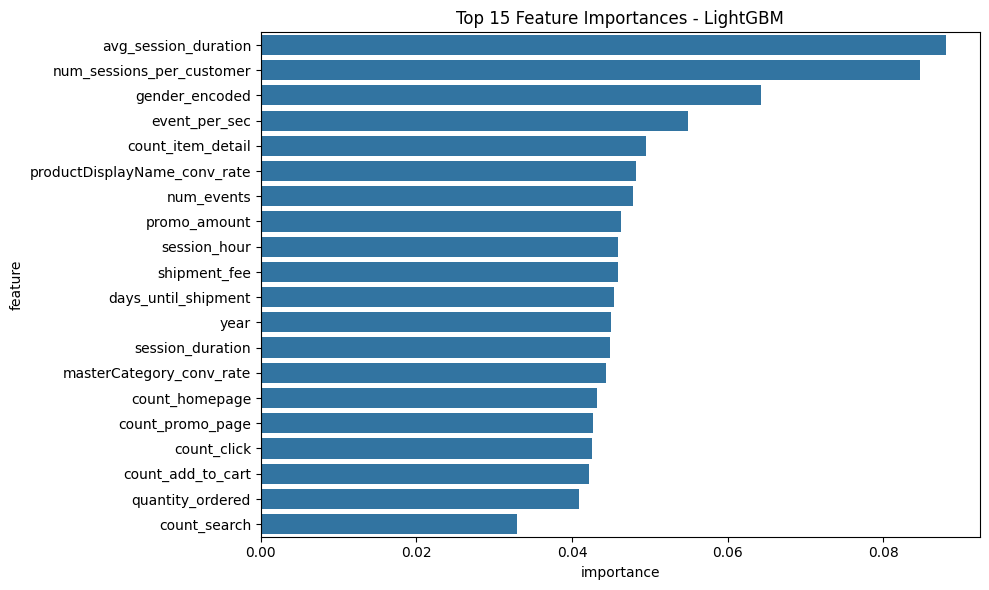

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the trained LightGBM model
importances = model.feature_importances_

# Create a DataFrame of feature names and importance values
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Show top 15 features
top_20 = feature_importance_df.head(20)
print(top_20)

# Optional: Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=top_20)
plt.title("Top 15 Feature Importances - LightGBM")
plt.tight_layout()
plt.show()


In [ ]:
sequential_df_modeling = df_for_modeling.copy()
sequential_df_modeling['funnel_length'] = sequential_df_modeling['funnel_sequence'].str.count('→') + 1



In [ ]:
#Event Position Indicators (Binary flags)
sequential_df_modeling['starts_with_homepage'] = sequential_df_modeling['funnel_sequence'].str.startswith('HOMEPAGE').astype(int)
sequential_df_modeling['ends_with_booking'] = sequential_df_modeling['funnel_sequence'].str.endswith('BOOKING').astype(int)
sequential_df_modeling['ends_with_cart'] = sequential_df_modeling['funnel_sequence'].str.endswith('ADD_TO_CART').astype(int)
sequential_df_modeling['ends_with_scroll'] = sequential_df_modeling['funnel_sequence'].str.endswith('SCROLL').astype(int)
sequential_df_modeling['ends_with_detail'] = sequential_df_modeling['funnel_sequence'].str.endswith('ITEM_DETAIL').astype(int)
sequential_df_modeling['ends_with_promo_page'] = sequential_df_modeling['funnel_sequence'].str.endswith('PROMO_PAGE').astype(int)
sequential_df_modeling['ends_with_add_promo'] = sequential_df_modeling['funnel_sequence'].str.endswith('ADD_PROMO').astype(int)


In [ ]:
#Presence of Key Events
sequential_df_modeling['has_add_to_cart'] = sequential_df_modeling['funnel_sequence'].str.contains('ADD_TO_CART').astype(int)
sequential_df_modeling['has_promo'] = sequential_df_modeling['funnel_sequence'].str.contains('ADD_PROMO').astype(int)


In [ ]:
sequential_df_modeling.columns

Index(['session_duration', 'num_events', 'funnel_sequence', 'count_click',
       'count_homepage', 'count_add_to_cart', 'count_item_detail',
       'count_search', 'count_promo_page', 'count_add_promo', 'session_hour',
       'event_per_sec', 'created_at', 'payment_method', 'payment_status',
       'promo_amount', 'promo_code', 'shipment_fee', 'shipment_date_limit',
       'total_amount', 'quantity_ordered', 'masterCategory', 'subCategory',
       'season', 'year', 'num_sessions_per_customer', 'avg_session_duration',
       'gender', 'first_join_date_y', 'converted', 'events_per_session',
       'add_to_cart_ratio', 'promo_to_total_ratio',
       'product_detail_views_ratio', 'reached_cart', 'funnel_depth_score',
       'session_duration_bucket', 'total_amount_bucket', 'funnel_length',
       'starts_with_homepage', 'ends_with_booking', 'has_add_to_cart',
       'has_click', 'ends_with_cart', 'ends_with_scroll', 'ends_with_detail',
       'ends_with_promo_page', 'ends_with_add_promo',

In [ ]:
feature_cols = ['funnel_length', 'starts_with_homepage', 'ends_with_booking', 'ends_with_cart', 'ends_with_scroll', 'ends_with_detail',
                'ends_with_add_promo', 'ends_with_promo_page', 'has_add_to_cart', 'has_promo',
                'count_add_to_cart', 'count_click', 'count_homepage', 'count_promo_page', 'count_item_detail','count_search', 'count_add_promo',
                'product_detail_views_ratio', 'add_to_cart_ratio', 'reached_cart', 'funnel_depth_score']

X = sequential_df_modeling[feature_cols]
y = sequential_df_modeling['converted']

# Fit a model
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

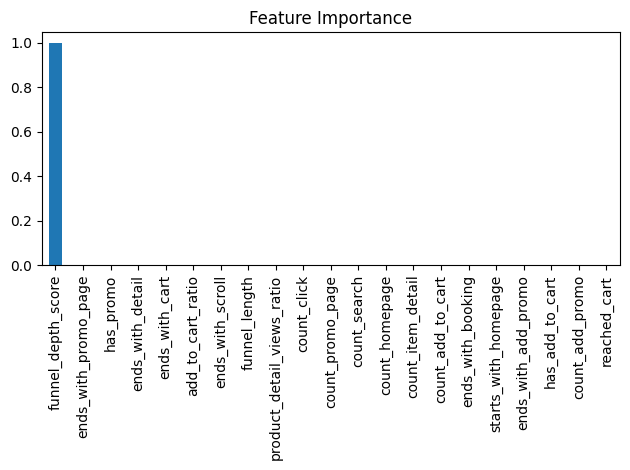

In [ ]:
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar', title='Feature Importance')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assuming your DataFrame is called df and contains 'funnel_sequence' and 'converted'
sequential_df_modeling = pd.read_parquet('df_for_modeling.parquet')
sequential_df_modeling['event_sequence'] = sequential_df_modeling['funnel_sequence'].str.split('→')

# Tokenize event names
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sequential_df_modeling['event_sequence'])

sequences = tokenizer.texts_to_sequences(sequential_df_modeling['event_sequence'])

# Pad sequences
max_len = max(len(seq) for seq in sequences)
X = pad_sequences(sequences, maxlen=max_len, padding='post')
y = sequential_df_modeling['converted'].values


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.metrics import classification_report
vocab_size = len(tokenizer.word_index) + 1  # +1 for padding

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=64, input_length=max_len))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)


Epoch 1/10
20143/20143 ━━━━━━━━━━━━━━━━━━━━ 468s 23ms/step - accuracy: 0.9114 - loss: 0.2997 - val_accuracy: 0.9127 - val_loss: 0.2965
Epoch 2/10
20143/20143 ━━━━━━━━━━━━━━━━━━━━ 472s 23ms/step - accuracy: 0.9116 - loss: 0.2990 - val_accuracy: 0.9127 - val_loss: 0.2962
Epoch 3/10
20143/20143 ━━━━━━━━━━━━━━━━━━━━ 508s 24ms/step - accuracy: 0.9115 - loss: 0.2993 - val_accuracy: 0.9127 - val_loss: 0.2963
Epoch 4/10
20143/20143 ━━━━━━━━━━━━━━━━━━━━ 476s 22ms/step - accuracy: 0.9112 - loss: 0.2999 - val_accuracy: 0.9127 - val_loss: 0.2963
Epoch 5/10
20143/20143 ━━━━━━━━━━━━━━━━━━━━ 508s 23ms/step - accuracy: 0.9112 - loss: 0.2999 - val_accuracy: 0.9127 - val_loss: 0.2962
Epoch 6/10
 8176/20143 ━━━━━━━━━━━━━━━━━━━━ 4:17 22ms/step - accuracy: 0.9124 - loss: 0.2970

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred))